<a href="https://colab.research.google.com/github/CharryDavid/Computer-Vision-Class-/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

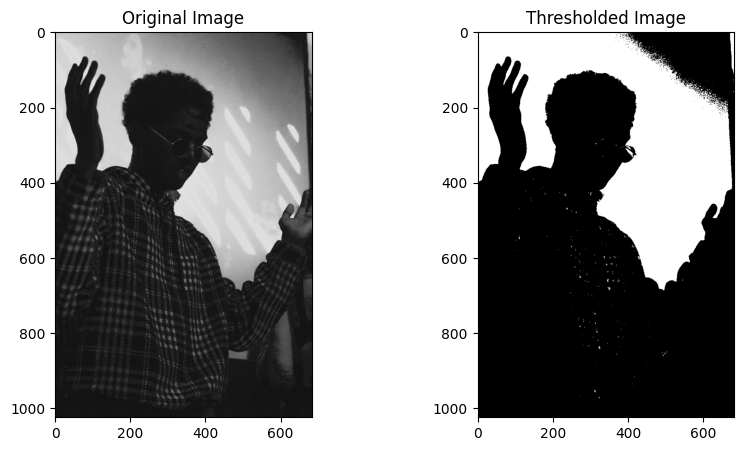

In [2]:
import skimage as sk
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_otsu

# Load the image
image = sk.io.imread('/content/DSC01949-ARW_DxO_DeepPRIME.jpg', as_gray=True)

# Apply Otsu's thresholding
threshold = threshold_otsu(image)
binary_image = image > threshold

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')
axes[1].imshow(binary_image, cmap=plt.cm.gray)
axes[1].set_title('Thresholded Image')
plt.show()

# Analysis of results
# Otsu's thresholding finds the threshold that maximizes inter-class variance.
# In this case, it separates pixels into two groups: object and background.
# The effectiveness depends on the image contrast.

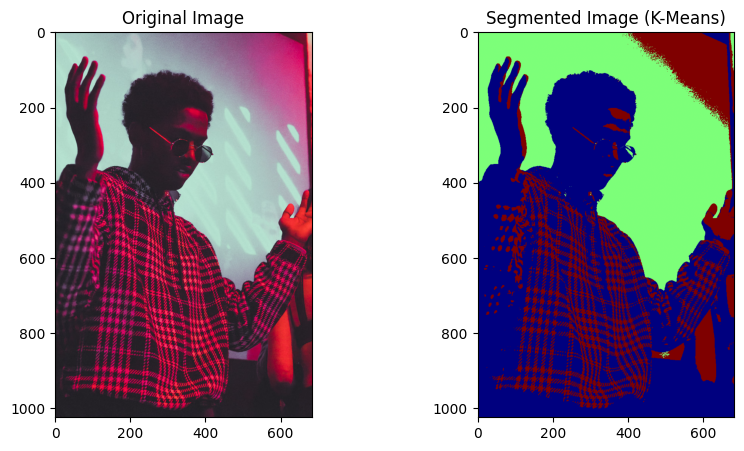

In [3]:
import numpy as np
from sklearn.cluster import KMeans

# Load the image
image = sk.io.imread('/content/DSC01949-ARW_DxO_DeepPRIME.jpg')

# Convert the image to a 2D array
image_2D = image.reshape((-1, 3))

# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(image_2D)
segmented_image = kmeans.labels_.reshape(image.shape[:2])

# Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(segmented_image, cmap=plt.cm.jet)
axes[1].set_title('Segmented Image (K-Means)')
plt.show()

# Evaluation of results
# K-Means groups pixels into clusters based on their color similarity.
# The quality of segmentation depends on the choice of the number of clusters.
# Metrics like silhouette score can be used to evaluate the quality.

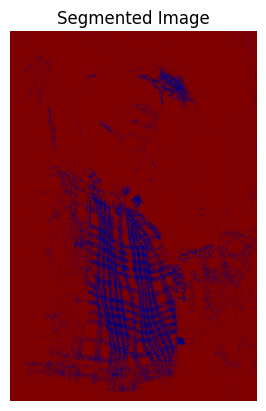

In [13]:
from skimage import io, transform
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load image
image = io.imread('/content/DSC01949-ARW_DxO_DeepPRIME.jpg')

# Load label image and resize it to match the image shape
label_image = io.imread('/content/Figure_2.png', as_gray=True)
label_resized = transform.resize(label_image, image.shape[:2], order=0, preserve_range=True).astype(np.uint8)

# Flatten image and labels
image_2D = image.reshape(-1, 3)
labels_1D = label_resized.reshape(-1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(image_2D, labels_1D, test_size=0.2, random_state=0)

# Train classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Predict the full image
predicted_labels = classifier.predict(image_2D).reshape(image.shape[:2])

# Show result
plt.imshow(predicted_labels, cmap='jet')
plt.title("Segmented Image")
plt.axis('off')
plt.show()
